In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
print(os.getcwd())
#change working directory to the location of the data file
os.chdir('/mnt/d/Sajjad/08-2023/Python Code/Text Analytics Fall 2024/')
print(os.getcwd())

/mnt/c/Users/sahaider/AppData/Local/Programs/Microsoft VS Code
/mnt/d/Sajjad/08-2023/Python Code/Text Analytics Fall 2024


Read the headline dataset have 12 records

In [3]:
with open('new_headlines.txt','r',encoding="utf8") as f:
    document = f.readlines()
f.close()
document

['Matters with IMF expected to be settled today: Dar\n',
 '"Pakistan awaits fiscal  economic policies draft from IMF today"\n',
 'Pakistan pins hopes on IMF loan to keep economy afloat\n',
 '"Pakistan  IMF agree on ‘some matters’  Aisha Pasha claims"\n',
 'Jennifer Lopez asks people to help victims of earthquake in Turkey and Syria\n',
 '"Earthquake death toll hits 15 000 in Turkiye-Syria"\n',
 '"Sherry appeals public to help earthquake survivors of Turkiye  Syria"\n',
 'Charities collect funds for Turkey earthquake victims\n',
 "NA speaker yet to receive LHC order amid PTI's bid to return to assembly\n",
 'Not received LHC order suspending resignations of 43 PTI MNAs: NA speaker\n',
 '"LHC asks ECP  governor to file replies on PTI plea seeking Punjab poll date"\n',
 '"LHC order paves way for 43 PTI MNAs’ return to assembly  for now"']

CountVectorizer

In [4]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

Building count vectorizer

In [5]:
cnt_vectorizer = CountVectorizer() 
features = cnt_vectorizer.fit_transform(document)
features_nd = features.toarray()
features_nd

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
      

In [6]:
features_nd.shape

(12, 83)

In [7]:
from sklearn.cluster import KMeans

In [11]:
km = KMeans(n_clusters =3)
km.fit(features_nd)
new_labels = km.labels_
print(new_labels)

[0 0 0 0 1 1 1 1 2 2 0 2]


In [12]:
# Final locations of the centroid
km.cluster_centers_

array([[0.        , 0.        , 0.        , 0.2       , 0.2       ,
        0.2       , 0.        , 0.        , 0.        , 0.2       ,
        0.        , 0.2       , 0.2       , 0.        , 0.        ,
        0.2       , 0.        , 0.2       , 0.2       , 0.        ,
        0.2       , 0.        , 0.2       , 0.2       , 0.2       ,
        0.2       , 0.2       , 0.2       , 0.        , 0.2       ,
        0.        , 0.2       , 0.        , 0.        , 0.2       ,
        0.8       , 0.        , 0.        , 0.2       , 0.2       ,
        0.2       , 0.        , 0.4       , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.6       , 0.        ,
        0.6       , 0.2       , 0.        , 0.        , 0.2       ,
        0.2       , 0.2       , 0.2       , 0.2       , 0.        ,
        0.2       , 0.        , 0.        , 0.2       , 0.        ,
        0.        , 0.2       , 0.2       , 0.        , 0.2       ,
        0.        , 0.        , 0.        , 0.  

In [ ]:
# The number of iterations required to converge
km.n_iter_

Elbow Curve

In [14]:
from matplotlib import pyplot as plt

[90.0, 74.25, 61.833333333333336, 51.0, 42.5, 34.75, 27.5, 20.0, 13.0, 6.5, 0.0]


Text(0.5, 1.0, 'Elbow curve')

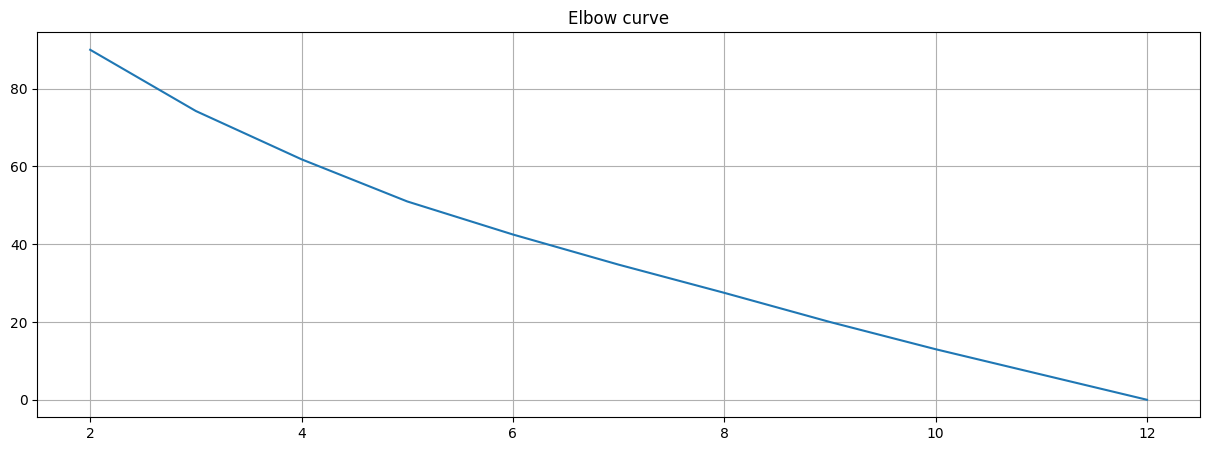

In [15]:
X = features_nd
sse = []
for k in range(2, 13):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(features_nd)
    sse.append(kmeans.inertia_)
print(sse)
fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 13), sse)
plt.grid(True)
plt.title('Elbow curve')

Pre-Processing

In [16]:
import spacy

In [17]:
nlp = spacy.load('en_core_web_md')

In [18]:
sw = ["from","of","and", "on","for", "the","have","a","be","to","in","will","if","by","into","as"]

In [19]:
docs_list = []
for d in document:
    d_nlp = nlp(d.lower())
    t_list = []
    for token in d_nlp:
        tok_lem = str(token.lemma_)
        if (tok_lem not in sw):
            t_list.append(tok_lem)
    str_ = ' '.join(t_list) 
    docs_list.append(str_)
docs_list

['matter with imf expect settle today : dar \n',
 '" pakistan await fiscal   economic policy draft imf today " \n',
 'pakistan pin hope imf loan keep economy afloat \n',
 '" pakistan   imf agree \' some matter \'   aisha pasha claim " \n',
 'jennifer lopez ask people help victim earthquake turkey syria \n',
 '" earthquake death toll hit 15 000 turkiye - syria " \n',
 '" sherry appeal public help earthquake survivor turkiye   syria " \n',
 'charity collect fund turkey earthquake victim \n',
 "na speaker yet receive lhc order amid pti 's bid return assembly \n",
 'not receive lhc order suspend resignation 43 pti mnas : na speaker \n',
 '" lhc ask ecp   governor file reply pti plea seek punjab poll date " \n',
 '" lhc order pave way 43 pti mnas \' return assembly   now "']

In [20]:
cnt_vectorizer2 = CountVectorizer()
vec2 = cnt_vectorizer2.fit_transform(docs_list).toarray()
vec2.shape

(12, 74)

In [35]:
km2 = KMeans(n_clusters =3)
km2.fit(vec2)
new_labels2 = km2.labels_
print(new_labels2)

[2 2 2 2 1 1 1 1 0 0 0 0]


In [ ]:
X = vec2
sse = []
for k in range(2, 13):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(vec2)
    sse.append(kmeans.inertia_)
print(sse)
fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 13), sse)
plt.grid(True)
plt.title('Elbow curve')

Silhouette Coefficient

In [36]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [37]:
silhouette_avg = silhouette_score(X, new_labels2)
print("For n_clusters =", 3, "The average silhouette_score is :", silhouette_avg)

# Compute the silhouette scores for each sample
#sample_silhouette_values = silhouette_samples(X, new_labels2)

For n_clusters = 3 The average silhouette_score is : 0.09322514846568404


In [38]:
X = vec2
s_avg = []
for k in range(2, 12):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(vec2)
    sil_sc = silhouette_score(X, kmeans.labels_)
    s_avg.append(sil_sc)
print(s_avg)


[0.13686084592732356, 0.1327354159653836, 0.1519528257115895, 0.13429405901227084, 0.10181552099368664, 0.0984437862284218, 0.047959276338545104, 0.04441153531823994, 0.026876281999257134, 0.019120046873522534]


Affinity Propagation

### News API

### TFIDFVectorizer

In [39]:
with open('news_text_Feb_09.txt','r',encoding="utf8") as f:
    document = f.readlines()
f.close()
len(document)

271

In [40]:
tfidf_vectorizer = TfidfVectorizer()
vec4 = tfidf_vectorizer.fit_transform(document).toarray()
vec4.shape

(271, 1444)

In [41]:
X = vec4
sse = []
for k in range(2, 25):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(vec4)
    sse.append(kmeans.inertia_)
#print(sse)


Text(0.5, 1.0, 'Elbow curve')

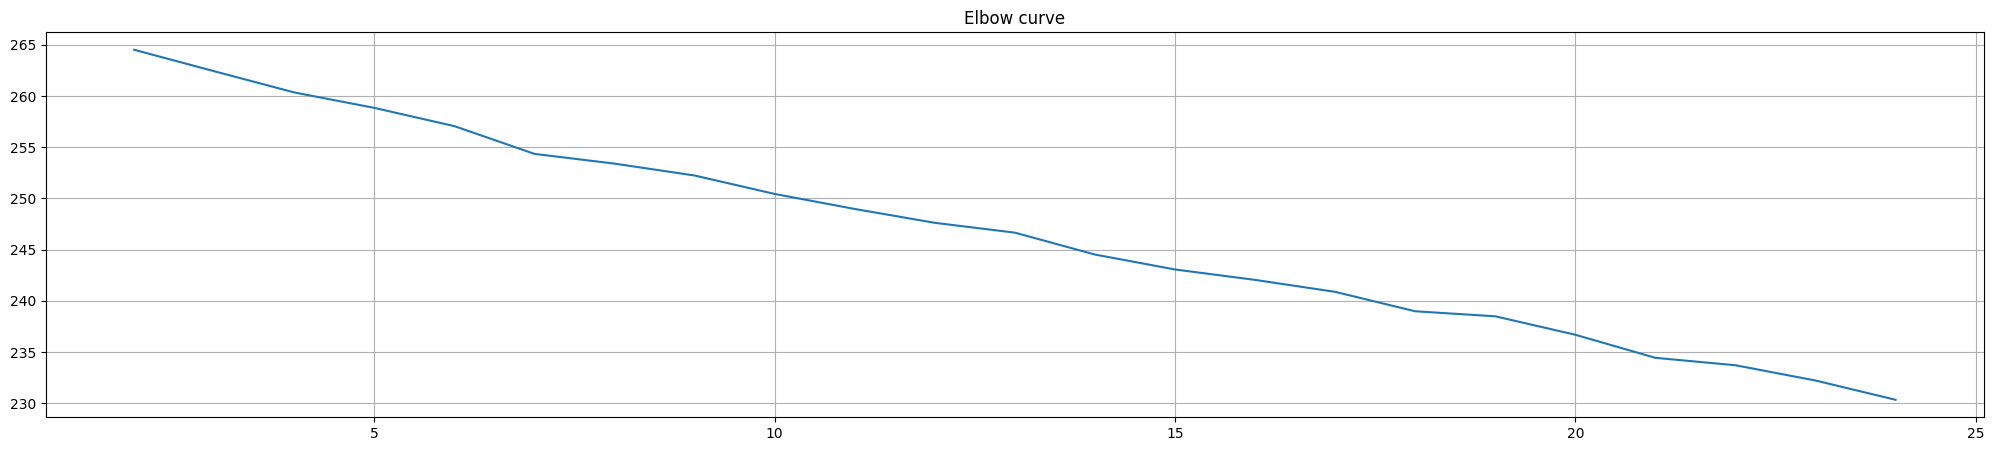

In [42]:
fig = plt.figure(figsize=(25, 5))
plt.plot(range(2, 25), sse)
plt.grid(True)
plt.title('Elbow curve')

Text(0.5, 1.0, 'Silhouette')

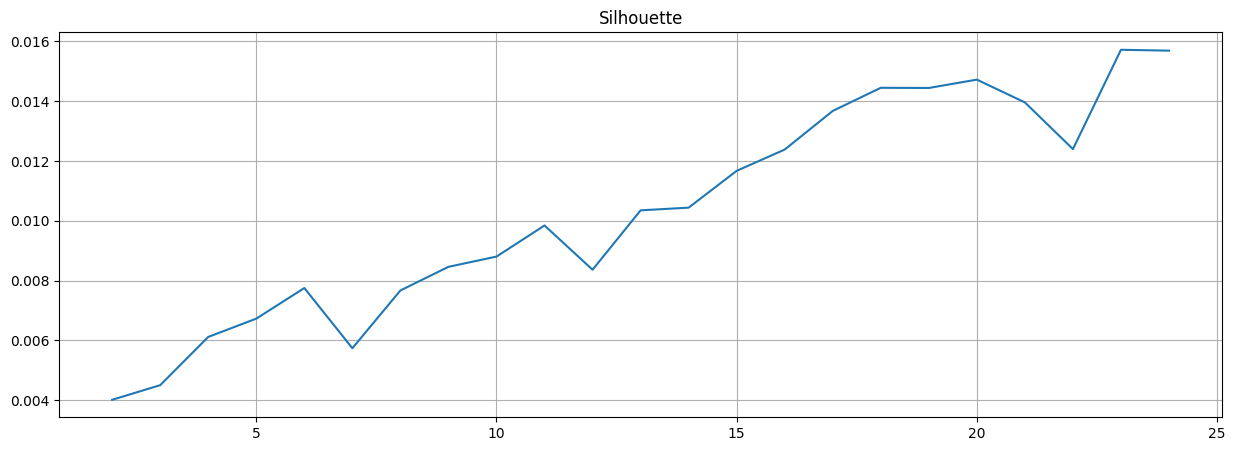

In [43]:
X = vec4
s_avg = []
for k in range(2, 25):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(vec4)
    sil_sc = silhouette_score(X, kmeans.labels_)
    s_avg.append(sil_sc)
#print(s_avg)
fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 25), s_avg)
plt.grid(True)
plt.title('Silhouette')